<a href="https://colab.research.google.com/github/SkaiLord/ML-Lab/blob/main/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

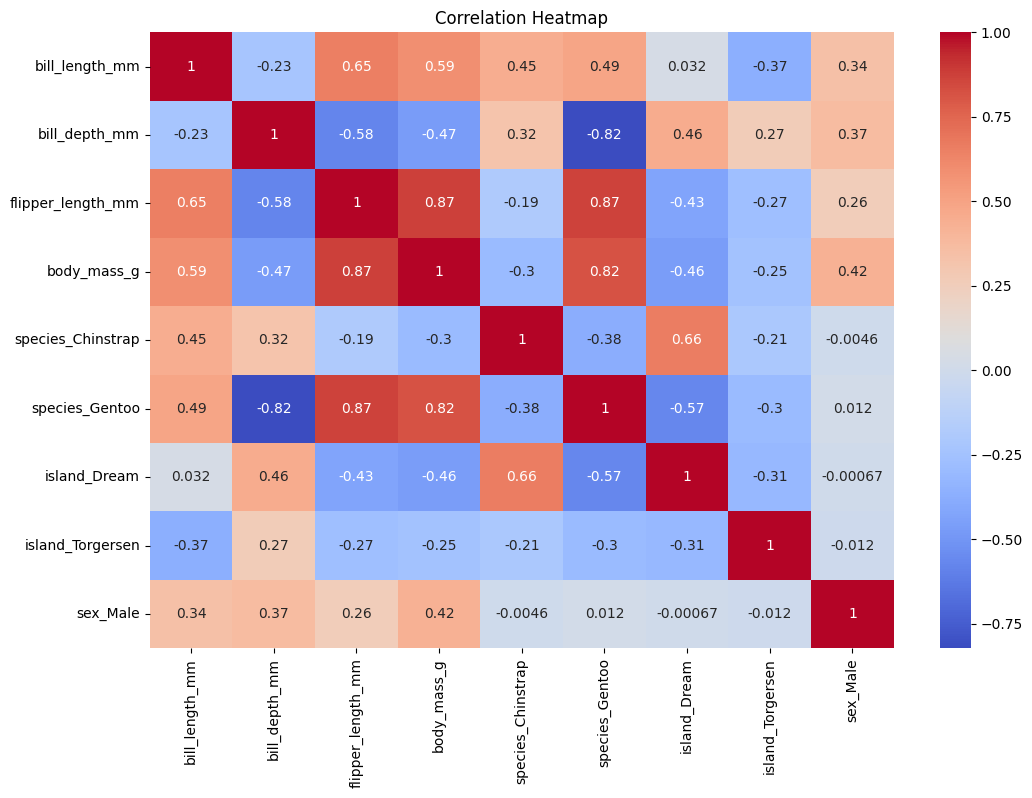

Columns to drop correlation > 0.8 ['body_mass_g', 'species_Gentoo']


In [ ]:
# Feature Selection using filter wrapper
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading & setting dummy values
data = sb.load_dataset("penguins")
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Correlation
corr_matrix = data.corr()

# Matrix plot
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Finding highly correlated columns
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finding columns with correlation greater than threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(abs(upper[column]) > threshold)]
print(f"Columns to drop correlation > {threshold}",to_drop)

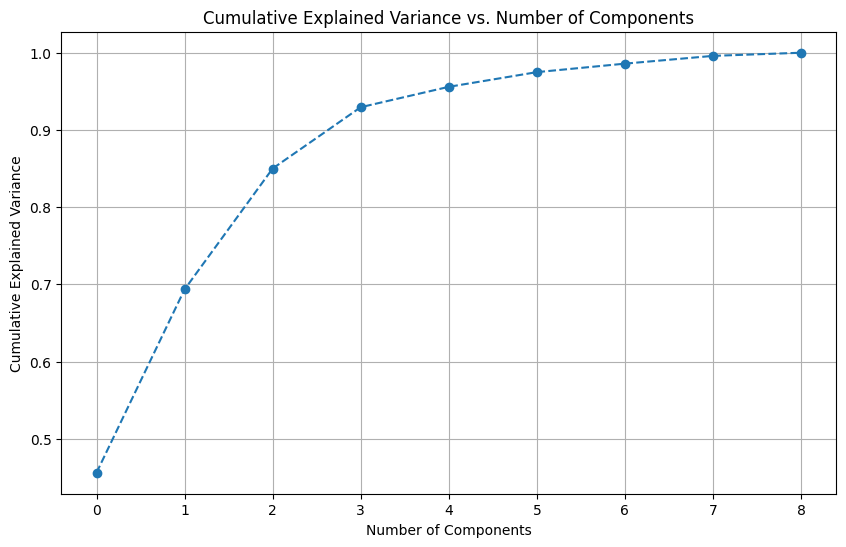

In [ ]:
# Feature Selection using PCA
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading & setting dummy values
data = sb.load_dataset("penguins")
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(explained_variance_ratio)), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
